In [1]:
import numpy as np 
import pandas as pd 
import csv
from os import path
from PIL import Image

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Importing TextBlob
from textblob import TextBlob

In [5]:
retention = pd.read_csv('Retention.csv')

retention.head()

,Year,Q1_Awareness,Q2_Influence,Q3_retention_OE,Q4_Program,Q5_Catalog
0,2020,0,-1,-1,0,1
1,2020,1,0,-1,1,1
2,2020,1,1,-1,0,1
3,2020,1,1,I loved getting to be in the classroom and wat...,1,1
4,2020,1,1,The teachers in the classroom I observed made ...,1,1


In [6]:
#drop method
retention = retention.drop(retention[retention.Q3_retention_OE == '-1'].index)
retention.to_csv('retention.csv', index=False)

In [7]:
retention.dtypes

Year                int64
Q1_Awareness        int64
Q2_Influence        int64
Q3_retention_OE    object
Q4_Program          int64
Q5_Catalog          int64
dtype: object

In [8]:
retention.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 3 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             96 non-null     int64 
 1   Q1_Awareness     96 non-null     int64 
 2   Q2_Influence     96 non-null     int64 
 3   Q3_retention_OE  96 non-null     object
 4   Q4_Program       96 non-null     int64 
 5   Q5_Catalog       96 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 5.2+ KB


In [9]:
retention.describe()

,Year,Q1_Awareness,Q2_Influence,Q4_Program,Q5_Catalog
count,96.000000,96.0,96.000000,96.000000,96.0
mean,2021.614583,1.0,0.906250,0.697917,1.0
std,1.173118,0.0,0.293011,0.461571,0.0
min,2020.000000,1.0,0.000000,0.000000,1.0
25%,2020.000000,1.0,1.000000,0.000000,1.0
50%,2022.000000,1.0,1.000000,1.000000,1.0
75%,2023.000000,1.0,1.000000,1.000000,1.0
max,2023.000000,1.0,1.000000,1.000000,1.0


<Axes: >

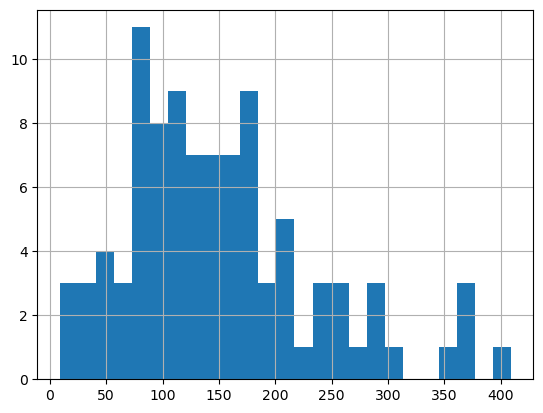

In [10]:
seq_length = [len(i) for i in retention['Q3_retention_OE']]

pd.Series(seq_length).hist(bins = 25)

In [11]:
# remove special characters from text column
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace('[#,@,&]', '')
#Remove twitter handlers
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace('@[^\s]+','')
#Remove digits
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace(' \d+ ','')
# remove multiple spaces with single space
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace("http\S+", "")
# remove multiple spaces with single space
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace('\s+', ' ')
#remove all single characters
retention.Q3_retention_OE = retention.Q3_retention_OE.str.replace(r'\s+[a-zA-Z]\s+', '')

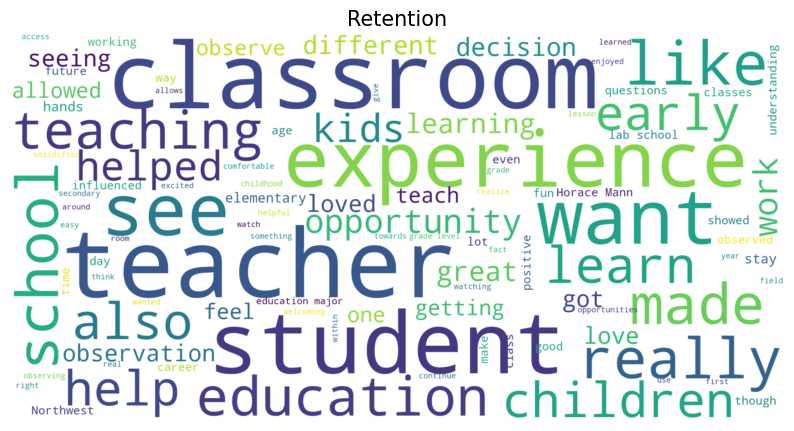

In [23]:
# Get stopwords
# Define nltk stopwords in english
stop_words = stopwords.words('english')
stop_words.extend(['would', 'get', 'able','ha', 'wa', '-'])

# Get a string of tweets 
retention_text = ",".join(retention.Q3_retention_OE)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(retention_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Retention',fontsize=15)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'teacher'),
  Text(1, 0, 'classroom'),
  Text(2, 0, 'student'),
  Text(3, 0, 'want'),
  Text(4, 0, 'see'),
  Text(5, 0, 'experience'),
  Text(6, 0, 'school'),
  Text(7, 0, 'education'),
  Text(8, 0, 'like'),
  Text(9, 0, 'really')])

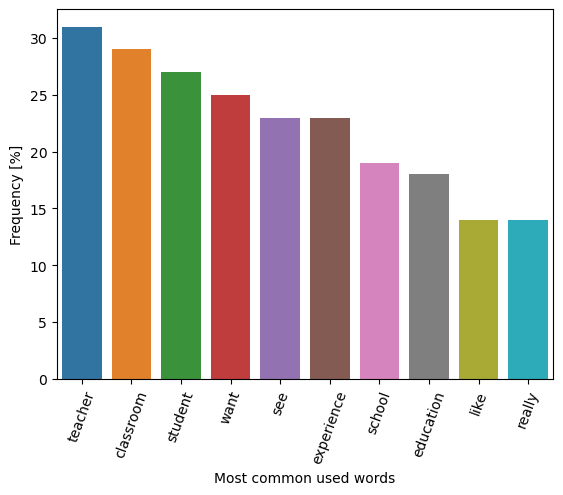

In [13]:
# lemmatize text column by using a lemmatize function
def lemmatize_text(Q3_retention_OE):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Q3_retention_OE.lower())]


# Initialize the Lemmatizer and Whitespace Tokenizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Lemmatize words
retention['lemmatized'] = retention.Q3_retention_OE.apply(lemmatize_text)
retention['lemmatized'] = retention['lemmatized'].apply(lambda x: [word for word in x if word not in stop_words])

# use explode to expand the lists into separate rows
wf_retention = retention.lemmatized.explode().to_frame().reset_index(drop=True)

# plot dfe
sns.countplot(x='lemmatized', data=wf_retention, order=wf_retention.lemmatized.value_counts().iloc[:10].index)
plt.xlabel('Most common used words')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=70)

In [14]:
retention['polarity'] = retention.Q3_retention_OE.apply(lambda x: TextBlob(x).polarity)
retention['subjectivity'] = retention.Q3_retention_OE.apply(lambda x: TextBlob(x).subjectivity)

retention.head()

,Year,Q1_Awareness,Q2_Influence,Q3_retention_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity
3,2020,1,1,I loved getting to be in the classroom and wat...,1,1,"[loved, getting, classroom, watching, actual, ...",0.350000,0.450000
4,2020,1,1,The teachers in the classroom I observed made ...,1,1,"[teacher, classroom, observed, made, fun, made...",0.390000,0.260000
5,2020,1,1,The kids have the biggest impact on me on why ...,0,1,"[kid, biggest, impact, wanted, teacher., nice,...",0.650000,0.900000
6,2020,1,1,The school has provided me with easy access an...,1,1,"[school, provided, easy, access, heavy, opport...",0.245833,0.552083
7,2020,1,1,I enjoyed being able to work with students in ...,0,1,"[enjoyed, work, student, first, semester, coll...",0.262500,0.439583


In [15]:
retention['sentiment'] = np.where(retention.polarity > 0, 'positive', 
                                 np.where(retention.polarity < 0, 'negative', 'neutral'))
retention.head()

,Year,Q1_Awareness,Q2_Influence,Q3_retention_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity,sentiment
3,2020,1,1,I loved getting to be in the classroom and wat...,1,1,"[loved, getting, classroom, watching, actual, ...",0.350000,0.450000,positive
4,2020,1,1,The teachers in the classroom I observed made ...,1,1,"[teacher, classroom, observed, made, fun, made...",0.390000,0.260000,positive
5,2020,1,1,The kids have the biggest impact on me on why ...,0,1,"[kid, biggest, impact, wanted, teacher., nice,...",0.650000,0.900000,positive
6,2020,1,1,The school has provided me with easy access an...,1,1,"[school, provided, easy, access, heavy, opport...",0.245833,0.552083,positive
7,2020,1,1,I enjoyed being able to work with students in ...,0,1,"[enjoyed, work, student, first, semester, coll...",0.262500,0.439583,positive


In [16]:
retention.nlargest(5,'polarity')['Q3_retention_OE']

234     It is great experience! Everyone I k0w loves it.
121    It was a great experience to get some hands on...
15     I saw that I loved learning and being around t...
23     all of the teachers that I have observed have ...
50                                           It was good
Name: Q3_retention_OE, dtype: object

In [17]:
retention['sentiment'].value_counts()

sentiment
positive    83
neutral     11
negative     2
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelBinarizer

# LabelBinarize sentiment column and merge with retention DF
lb = LabelBinarizer()

sentbinarized = lb.fit_transform(retention['sentiment']).tolist()
#lb.classes_ # Classes of the LabelBinarizer

dfbinarized = pd.DataFrame(sentbinarized, columns=lb.classes_)
retention[dfbinarized.columns] = dfbinarized
retention.head()

,Year,Q1_Awareness,Q2_Influence,Q3_retention_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity,sentiment,negative,neutral,positive
3,2020,1,1,I loved getting to be in the classroom and wat...,1,1,"[loved, getting, classroom, watching, actual, ...",0.350000,0.450000,positive,0.0,0.0,1.0
4,2020,1,1,The teachers in the classroom I observed made ...,1,1,"[teacher, classroom, observed, made, fun, made...",0.390000,0.260000,positive,0.0,0.0,1.0
5,2020,1,1,The kids have the biggest impact on me on why ...,0,1,"[kid, biggest, impact, wanted, teacher., nice,...",0.650000,0.900000,positive,0.0,0.0,1.0
6,2020,1,1,The school has provided me with easy access an...,1,1,"[school, provided, easy, access, heavy, opport...",0.245833,0.552083,positive,0.0,0.0,1.0
7,2020,1,1,I enjoyed being able to work with students in ...,0,1,"[enjoyed, work, student, first, semester, coll...",0.262500,0.439583,positive,0.0,0.0,1.0


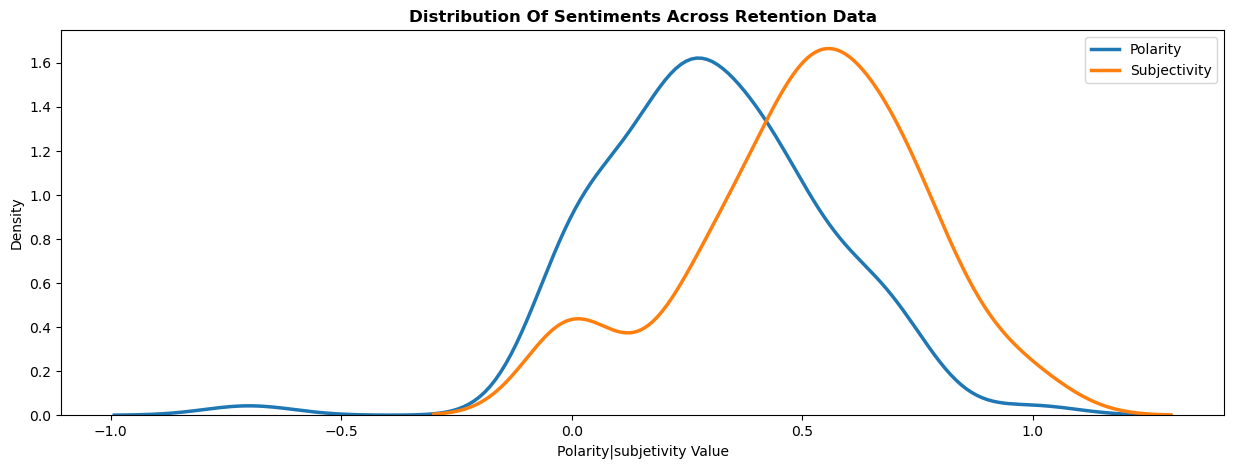

In [20]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Retention Data',fontsize=12,fontweight='bold')
sns.kdeplot(retention['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(retention['subjectivity'], label='Subjectivity', lw=2.5)
plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()


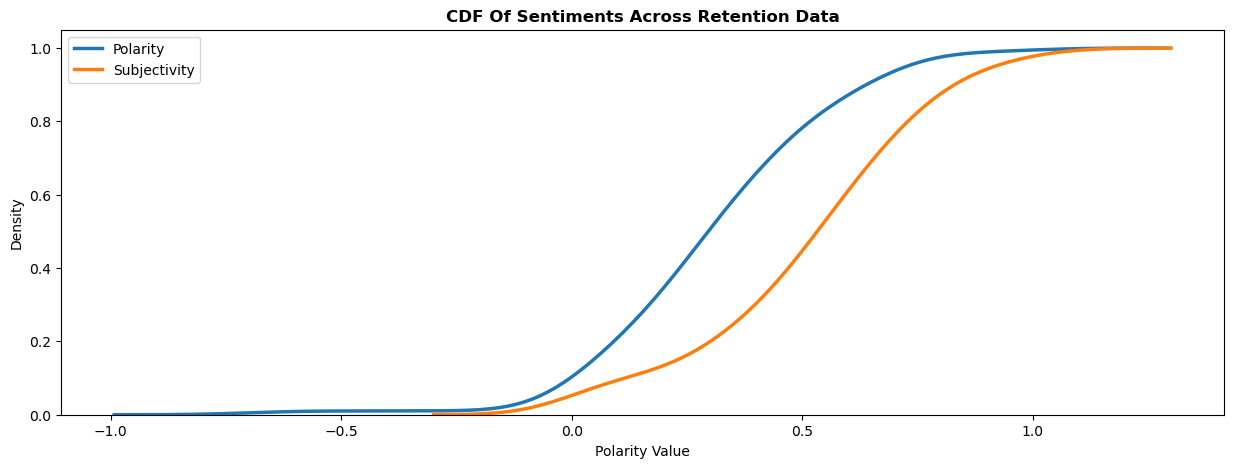

In [21]:
plt.figure(figsize=(15,5))
plt.title('CDF Of Sentiments Across Retention Data',fontsize=12, fontweight='bold')
sns.kdeplot(retention['polarity'],cumulative=True, label='Polarity',lw=2.5)
sns.kdeplot(retention['subjectivity'],cumulative=True, label='Subjectivity',lw=2.5)
plt.xlabel('Polarity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()